<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Advanced Learning Algorithms/Week 1'
os.chdir(new_directory)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
X,y = load_data()

In [6]:
X.shape


(1000, 400)

In [7]:
y.shape

(1000, 1)

In [ ]:
y

In [9]:
import warnings

In [10]:
warnings.simplefilter(action = 'ignore', category = FutureWarning)

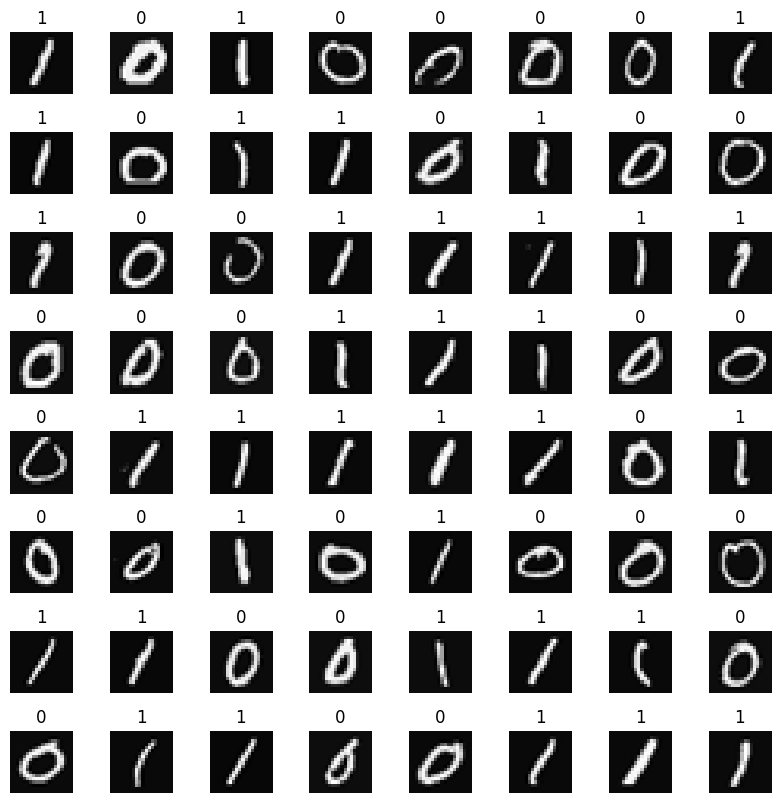

In [18]:
m,n = X.shape

fig, axes = plt.subplots(8,8,figsize = (8,8))
fig.tight_layout(pad =0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()


In [20]:
model = Sequential(
    [
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(25, activation = "sigmoid"),
    tf.keras.layers.Dense(15, activation = "sigmoid"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
    ], name = "my_model"
)


In [29]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs = 20
)

Epoch 1/20
32/32 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 9.1163e-04
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 7.8268e-04
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 6.7942e-04
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 5.9619e-04
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 5.2565e-04
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 4.6796e-04
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 4.1964e-04
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 3.7852e-04
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 3.4338e-04
Epoch 13/20
3

In [33]:
prediction = model.predict(X[0].reshape(1,400))

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0

print(f"Prediction after threshold: {yhat}")

1/1 [==============================] - 0s 24ms/step
Prediction after threshold: 0


1/1 [==============================] - 0s 26ms/step


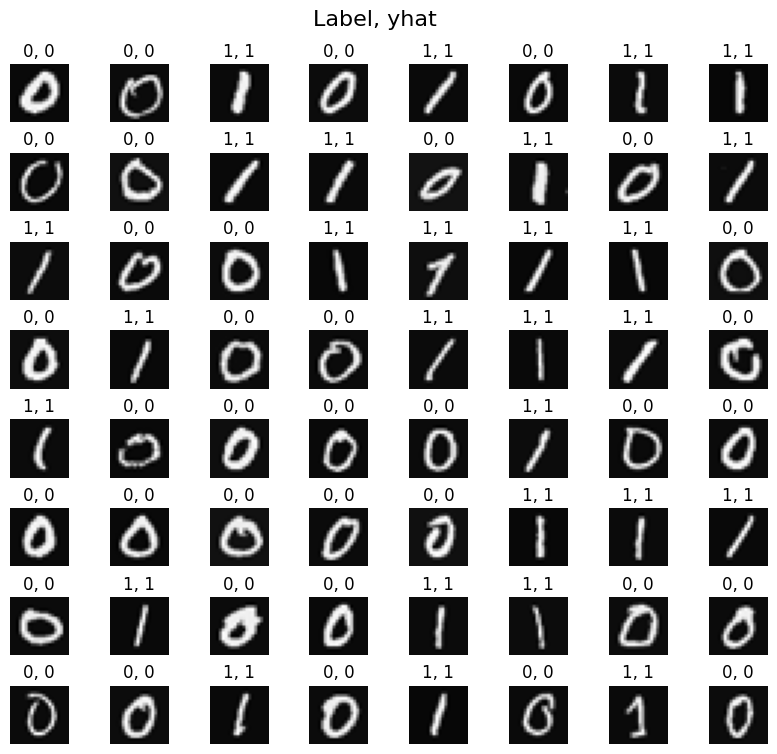

In [42]:
#Prediction

m,n = X.shape
fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1, rect = [0,0.03, 1, 0.92])   #Left, Bottom, Right, Top

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    ax.set_title(f"{y[random_index,0]}, {yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize = 16)
plt.show()


In [21]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                10025     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from public_tests import *
test_c1(model)

All tests passed!


In [23]:
L1_num_params = 400 * 25 + 25
L2_num_params = 25*15+15
L3_num_params = 15*1 +1

In [24]:
[layer1, layer2, layer3] = model.layers

In [26]:
W1, b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

In [43]:
def my_dense(a_in, W, b,g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w = W[:,i]
        z = np.dot(w,a_in) + b[i]
        a_out[i] = g(z)

    return a_out

In [46]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [47]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [48]:
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)

1/1 [==============================] - 0s 26ms/step


AttributeError: ignored

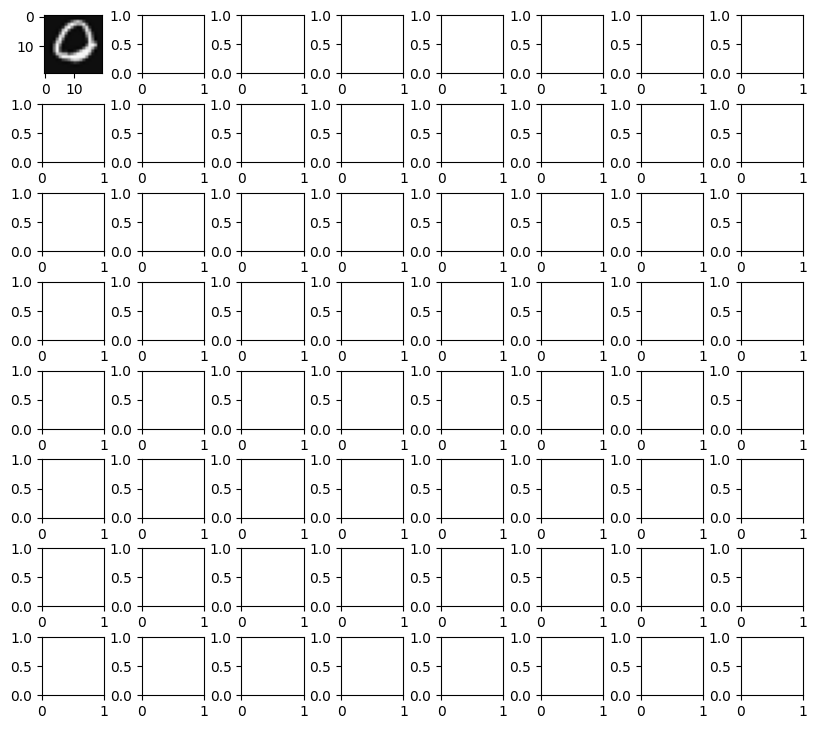

In [55]:
from IPython.core.pylabtools import figsize
m, n = X.shape
fig,axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad =0.1, rect = [0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')

    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)

    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(my_prediction >= 0.5)

    ax.set_title(f"{y[random_index,0]}, {tf_yhat},{my_yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()